In [1]:
import layoutparser as lp
import cv2
import os
from PIL import Image,ImageDraw
import json

# 1.Slide extraction

In [ ]:
import os
import layoutparser as lp
import cv2
from PIL import Image
import imagehash
from decord import VideoReader, cpu

DIFF_THRESHOLD = 2


vr = VideoReader(videoPath, ctx=cpu(0))
slides = []
prevImageHash = None
imageChanged = False

for i in len(vr):
    slide_time = vr.get_frame_timestamp(i)[0]
    frame = vr[i].asnumpy()
    pilImage = Image.fromarray(frame)
    prevImageHash = imagehash.average_hash(
        pilImage) if not prevImageHash else currentImageHash
    currentImageHash = imagehash.average_hash(pilImage)
    imageDiff = currentImageHash - prevImageHash

    if imageChanged and imageDiff < DIFF_THRESHOLD:
        slides.append(pilImage)
        has_floder = os.path.exists(videoPath.stem)
        if not has_floder:
            os.makedirs(videoPath.stem)
        pilImage.save("F:\\Desktop\\slide-extractor\\{}\\{}.jpg".format(
            videoPath.stem, slide_time))
        imageChanged = False

    if imageDiff > DIFF_THRESHOLD:
        imageChanged = True

# 2.Layout analyze

In [12]:
model = lp.Detectron2LayoutModel(
    config_path='D:\Desktop\project\layoutparser\LP\layout-model-training\config.yaml',
    model_path='D:\Desktop\project\layoutparser\LP\layout-model-training\model_final.pth',
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
    label_map={0: "Figure", 1: "Text", 2: "Title"}
)

image = cv2.imread(
    r"D:\Desktop\project\slide-extractor-master\Can Eyes on a Car Reduce Traffic Accidents_\95.0.jpg"
)
image = image[..., ::-1]
layout = model.detect(image)
color_map={'Figure':'blue', 'Text':'red', 'Title':'green'}
print("layout:",layout)

labeled_img = lp.draw_box(image, layout, box_width=5, color_map=color_map, show_element_id=True)



layout: Layout(_blocks=[TextBlock(block=Rectangle(x_1=773.30712890625, y_1=81.89378356933594, x_2=1105.89404296875, y_2=189.42938232421875), text=None, id=None, type=Title, parent=None, next=None, score=0.9970555305480957), TextBlock(block=Rectangle(x_1=1274.0858154296875, y_1=267.4761657714844, x_2=1675.6787109375, y_2=335.59552001953125), text=None, id=None, type=Text, parent=None, next=None, score=0.9923467636108398), TextBlock(block=Rectangle(x_1=372.9664001464844, y_1=267.2598571777344, x_2=755.1224975585938, y_2=338.351806640625), text=None, id=None, type=Text, parent=None, next=None, score=0.9570498466491699), TextBlock(block=Rectangle(x_1=1115.0467529296875, y_1=752.5552368164062, x_2=1827.3724365234375, y_2=791.9845581054688), text=None, id=None, type=Text, parent=None, next=None, score=0.8405129909515381), TextBlock(block=Rectangle(x_1=807.4904174804688, y_1=343.5821228027344, x_2=918.4180297851562, y_2=393.75677490234375), text=None, id=None, type=Text, parent=None, next=Non

d:\code\anaconda\envs\lp\detectron2\detectron2\structures\image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = torch.cat([max_size[:-2], (max_size[-2:] + (stride - 1)) // stride * stride])


## Get title of the slide

In [6]:
ocr_agent = lp.TesseractAgent(languages='eng')
title_blocks=lp.Layout([b for b in layout if b.type=='Title'])
block=title_blocks[0]
segment_image= block.pad(left=5, right=5, top=5, bottom=5).crop_image(image)
text = ocr_agent.detect(segment_image)
block.set(text=text, inplace=True)
print(title_blocks.get_texts(), end='\n---\n')

['Results\n']
---


## Get img of the slide

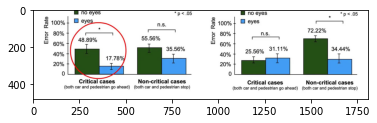

In [11]:
import matplotlib.pyplot as plt 
img_blocks=lp.Layout([b for b in layout if b.type=='Figure'])
for block in img_blocks:
    segment_image= block.pad(left=5, right=5, top=5, bottom=5).crop_image(image)
    im = Image.fromarray(segment_image)
    plt.imshow(im)
